# librairies

In [1]:
pip install tensorflow==2.13.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.2/524.2 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 106.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 25.3 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.13.1
    Uninstalling typing_extensions-4.13.1:
      Successfully uninstalled typing_extensions-4.13.1
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:
     

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import metrics, preprocessing , datasets, model_selection
from sklearn.metrics import accuracy_score , confusion_matrix ,classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import MinMaxScaler ,StandardScaler, LabelEncoder 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D ,Flatten ,Dense ,Dropout
from tensorflow.keras.utils import to_categorical




import warnings
warnings.filterwarnings('ignore')

# Chargement et exploration des données


In [3]:
df = pd.read_csv('/kaggle/input/images-in-csv-datasets/hmnist_28_28_RGB.csv')
df.head(10)


,pixel0000,pixel0001,pixel0002,pixel0003,pixel0004,pixel0005,pixel0006,pixel0007,pixel0008,pixel0009,...,pixel2343,pixel2344,pixel2345,pixel2346,pixel2347,pixel2348,pixel2349,pixel2350,pixel2351,label
0,192,153,193,195,155,192,197,154,185,202,...,173,124,138,183,147,166,185,154,177,2
1,25,14,30,68,48,75,123,93,126,158,...,60,39,55,25,14,28,25,14,27,2
2,192,138,153,200,145,163,201,142,160,206,...,167,129,143,159,124,142,136,104,117,2
3,38,19,30,95,59,72,143,103,119,171,...,44,26,36,25,12,17,25,12,15,2
4,158,113,139,194,144,174,215,162,191,225,...,209,166,185,172,135,149,109,78,92,2
5,8,1,3,19,5,10,26,8,13,34,...,12,3,7,5,0,1,4,0,0,2
6,194,147,137,197,148,139,197,148,132,200,...,211,160,163,211,162,166,208,162,166,2
7,161,121,105,169,128,119,172,129,116,176,...,141,103,92,87,59,56,32,18,19,2
8,125,84,85,165,114,118,181,120,125,188,...,119,80,79,62,35,41,19,8,13,2
9,228,179,194,227,174,191,226,165,182,215,...,217,142,156,219,154,166,216,146,154,2


In [4]:
df.shape

(10015, 2353)

In [5]:
df.columns[-1]
df['label'].value_counts()

label
4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: count, dtype: int64

# Reshaper et afficher une image

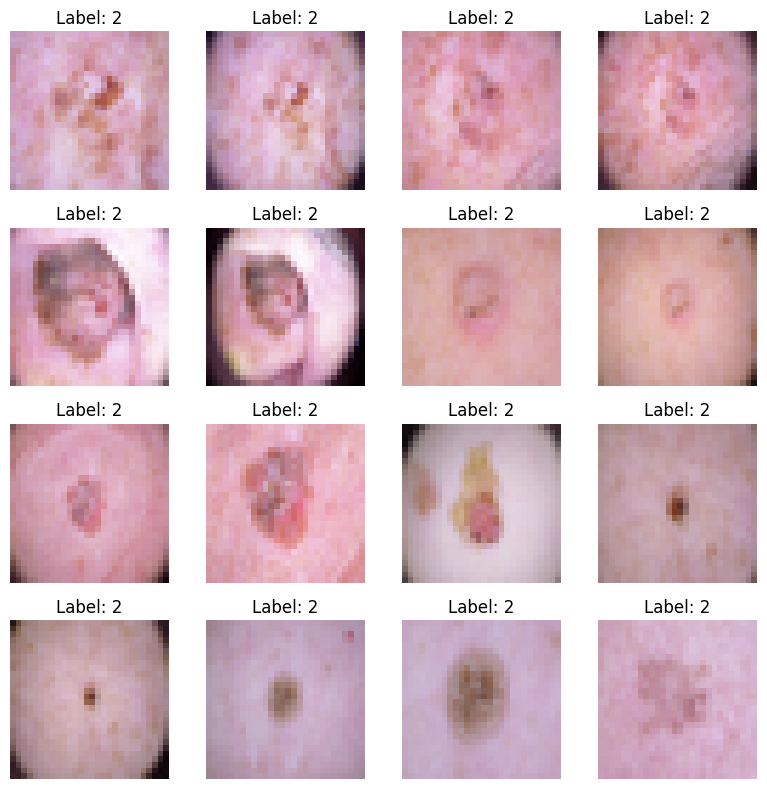

In [6]:
# 9 premières images
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
for i in range(16):

    pixels = df.iloc[i, :-1].values.astype(np.uint8).reshape((28, 28, 3))
    label = df.iloc[i, -1]
    plt.subplot(4, 4, i + 1)
    plt.imshow(pixels)
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.tight_layout()
plt.show()


# Séparer les pixels (X) et les labels (y)

In [7]:
X = df.drop(columns=["label"]).values
y = df["label"].values


# Remettre les images en forme (reshape)

In [8]:
X = X.reshape(-1, 28, 28, 3)  # nb_images x hauteur x largeur x canaux
#(hauteur = 28, largeur = 28, 3 couleurs : R, G, B)

# Normaliser les valeurs des pixels

In [9]:
X=X/225.0

# Encoder les labels

In [10]:
from tensorflow.keras.utils import to_categorical
y_cat = to_categorical(y)

# Diviser les données en entraînement / test

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.2, stratify=y, random_state=42)


# Afficher quelques images pour vérifier

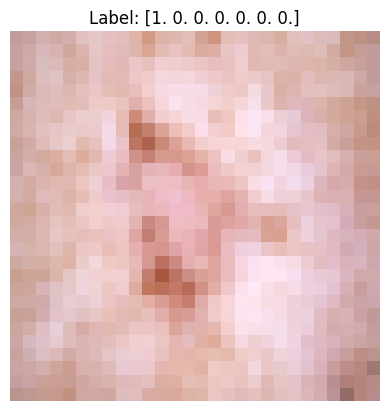

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Remettre les valeurs dans la plage 0-255
image = (X_train[1] * 255.0 / X_train[1].max()).reshape(28, 28, 3).astype(np.uint8)

# Affichage
plt.imshow(image)
plt.title(f"Label: {y_train[1]}")
plt.axis('off')
plt.show()



# Créer un modèle CNN

In [13]:
num_classes = df['label'].nunique()


model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])


# Compiler et entraîner le modèle

In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
201/201 [==============================] - 4s 15ms/step - loss: 1.0414 - accuracy: 0.6648 - val_loss: 0.9323 - val_accuracy: 0.6669
Epoch 2/10
201/201 [==============================] - 3s 13ms/step - loss: 0.8927 - accuracy: 0.6795 - val_loss: 0.8737 - val_accuracy: 0.6825
Epoch 3/10
201/201 [==============================] - 3s 13ms/step - loss: 0.8733 - accuracy: 0.6859 - val_loss: 0.8433 - val_accuracy: 0.6974
Epoch 4/10
201/201 [==============================] - 3s 14ms/step - loss: 0.8403 - accuracy: 0.6897 - val_loss: 0.7979 - val_accuracy: 0.7037
Epoch 5/10
201/201 [==============================] - 3s 14ms/step - loss: 0.8254 - accuracy: 0.6951 - val_loss: 0.7978 - val_accuracy: 0.7062
Epoch 6/10
201/201 [==============================] - 3s 13ms/step - loss: 0.7836 - accuracy: 0.7106 - val_loss: 0.7653 - val_accuracy: 0.7211
Epoch 7/10
201/201 [==============================] - 3s 13ms/step - loss: 0.7541 - accuracy: 0.7156 - val_loss: 0.7306 - val_accuracy: 0.7380

# Évaluer les performances

In [15]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Accuracy sur le test :", test_acc)


63/63 [==============================] - 0s 4ms/step - loss: 0.7291 - accuracy: 0.7274
Accuracy sur le test : 0.7274088859558105


# Matrice de confusion et le rapport

63/63 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.41      0.25      0.31        65
           1       0.34      0.68      0.45       103
           2       0.62      0.15      0.24       220
           3       0.00      0.00      0.00        23
           4       0.80      0.95      0.87      1341
           5       0.78      0.50      0.61        28
           6       0.53      0.21      0.30       223

    accuracy                           0.73      2003
   macro avg       0.50      0.39      0.40      2003
weighted avg       0.70      0.73      0.68      2003



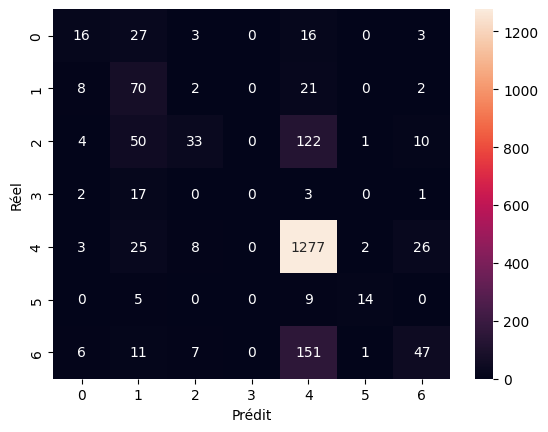

In [16]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print(classification_report(y_true_labels, y_pred_labels))

cm = confusion_matrix(y_true_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


In [17]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.model_selection import train_test_split

# Suppose que X et y sont tes données et labels d'entraînement
# Si y est one-hot encodé, ça fonctionne aussi

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,    # 20% pour la validation
    random_state=42,
    stratify=np.argmax(y_train, axis=1)  # important pour conserver la distribution des classes
)


# Si y_train est one-hot encodé, on récupère les labels réels
y_train_labels = np.argmax(y_train, axis=1)

# Calcul des classes uniques et des poids
classes = np.unique(y_train_labels)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_labels)

# Conversion en dictionnaire pour Keras
class_weights_dict = dict(zip(classes, class_weights))

# Entraînement du modèle avec les poids de classe
model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(X_val, y_val),
    class_weight=class_weights_dict
)

# Évaluation finale
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Accuracy sur le test :", test_acc)



Epoch 1/20
201/201 [==============================] - 3s 13ms/step - loss: 1.3909 - accuracy: 0.5194 - val_loss: 1.0771 - val_accuracy: 0.5115
Epoch 2/20
201/201 [==============================] - 3s 13ms/step - loss: 1.2955 - accuracy: 0.5154 - val_loss: 0.9294 - val_accuracy: 0.6020
Epoch 3/20
201/201 [==============================] - 3s 13ms/step - loss: 1.2054 - accuracy: 0.5581 - val_loss: 0.9397 - val_accuracy: 0.6076
Epoch 4/20
201/201 [==============================] - 3s 13ms/step - loss: 1.1487 - accuracy: 0.5787 - val_loss: 1.0538 - val_accuracy: 0.5153
Epoch 5/20
201/201 [==============================] - 3s 13ms/step - loss: 1.0689 - accuracy: 0.5843 - val_loss: 1.0386 - val_accuracy: 0.5770
Epoch 6/20
201/201 [==============================] - 3s 13ms/step - loss: 1.0459 - accuracy: 0.5921 - val_loss: 0.8815 - val_accuracy: 0.6313
Epoch 7/20
201/201 [==============================] - 3s 13ms/step - loss: 0.9737 - accuracy: 0.6073 - val_loss: 0.9407 - val_accuracy: 0.5889

63/63 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.37      0.48      0.42        65
           1       0.41      0.60      0.49       103
           2       0.37      0.58      0.45       220
           3       0.31      0.52      0.39        23
           4       0.94      0.68      0.79      1341
           5       0.71      0.86      0.77        28
           6       0.38      0.63      0.47       223

    accuracy                           0.66      2003
   macro avg       0.50      0.62      0.54      2003
weighted avg       0.76      0.66      0.69      2003



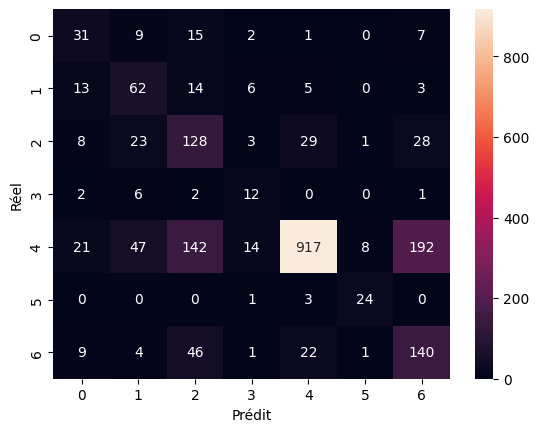

In [18]:
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print(classification_report(y_true_labels, y_pred_labels))

cm = confusion_matrix(y_true_labels, y_pred_labels)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()


In [19]:
from xgboost import XGBClassifier

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.model_selection import train_test_split
# Séparation des features et des labels
X = df.drop("label", axis=1).values  # Doit être 2D : (n_samples, 2352)
y = df["label"].values

# Vérification et aplatissement si nécessaire
if len(X.shape) > 2:
    X = X.reshape((X.shape[0], -1))

# Calcul des poids de classe
classes = np.unique(y)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y)
class_weight_dict = dict(zip(classes, class_weights))

# Split des données en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Création du modèle XGBoost
model = XGBClassifier(
    objective="multi:softprob",
    num_class=len(classes),
    eval_metric="mlogloss",
    use_label_encoder=False,
    verbosity=1
)

# Création des poids pour chaque échantillon d'entraînement
sample_weights = np.array([class_weight_dict[label] for label in y_train])

# Entraînement du modèle
model.fit(X_train, y_train, sample_weight=sample_weights)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
print("Accuracy sur le test :", accuracy_score(y_test, y_pred))
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

Accuracy sur le test : 0.7304043934098852

Rapport de classification :
               precision    recall  f1-score   support

           0       0.37      0.26      0.31        65
           1       0.51      0.45      0.47       103
           2       0.44      0.44      0.44       220
           3       0.29      0.09      0.13        23
           4       0.83      0.91      0.87      1341
           5       0.86      0.43      0.57        28
           6       0.44      0.30      0.36       223

    accuracy                           0.73      2003
   macro avg       0.53      0.41      0.45      2003
weighted avg       0.71      0.73      0.71      2003

